In [1]:
import pandas as pd 

df = pd.read_csv("../data/raw/titanic.csv")

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1310,1,1,"Name1310, Miss. Surname1310",female,NaN,0,0,SOTON/O2 3101272,76.760165,NaN,C
1,1311,0,3,"Name1311, Col. Surname1311",male,29.0,0,0,223596,10.193097,NaN,S
2,1312,0,3,"Name1312, Mr. Surname1312",male,20.0,0,0,54636,12.029416,C83,C
3,1313,0,3,"Name1313, Mr. Surname1313",male,27.0,0,0,PC 17760,13.429448,NaN,S
4,1314,0,3,"Name1314, Mr. Surname1314",male,32.0,0,0,364512,4.840769,E33,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1.000000e+06,1000000.000000,1000000.00000,801400.000000,1000000.000000,1000000.000000,1000000.000000
mean,5.013095e+05,0.381681,2.31125,29.280339,0.511101,0.360037,33.461097
std,2.886753e+05,0.485799,0.83577,12.744978,1.104846,0.767296,47.976641
min,1.310000e+03,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,2.513098e+05,0.000000,2.00000,21.000000,0.000000,0.000000,8.568924
50%,5.013095e+05,0.000000,3.00000,29.000000,0.000000,0.000000,15.883647
75%,7.513092e+05,1.000000,3.00000,37.000000,1.000000,0.000000,35.561000
max,1.001309e+06,1.000000,3.00000,114.000000,8.000000,6.000000,640.883614


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   PassengerId  1000000 non-null  int64  
 1   Survived     1000000 non-null  int64  
 2   Pclass       1000000 non-null  int64  
 3   Name         1000000 non-null  str    
 4   Sex          1000000 non-null  str    
 5   Age          801400 non-null   float64
 6   SibSp        1000000 non-null  int64  
 7   Parch        1000000 non-null  int64  
 8   Ticket       1000000 non-null  str    
 9   Fare         1000000 non-null  float64
 10  Cabin        229805 non-null   str    
 11  Embarked     997760 non-null   str    
dtypes: float64(2), int64(5), str(5)
memory usage: 91.6 MB


In [3]:
import matplotlib.pyplot as plt

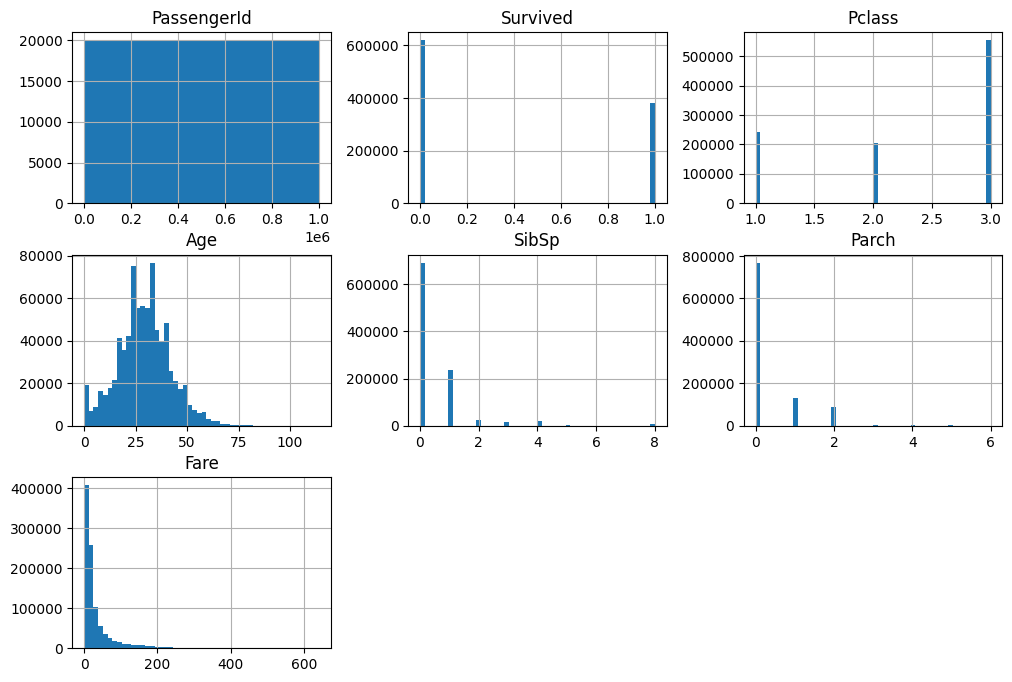

In [6]:
df.hist(figsize=(12, 8), bins=50)
plt.show()

In [7]:
df.Sex.info()

<class 'pandas.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: Sex
Non-Null Count    Dtype
--------------    -----
1000000 non-null  str  
dtypes: str(1)
memory usage: 7.6 MB


In [8]:
df.Sex.head()

0    female
1      male
2      male
3      male
4      male
Name: Sex, dtype: str

In [9]:
df.Sex.describe()

count     1000000
unique          2
top          male
freq       648840
Name: Sex, dtype: object

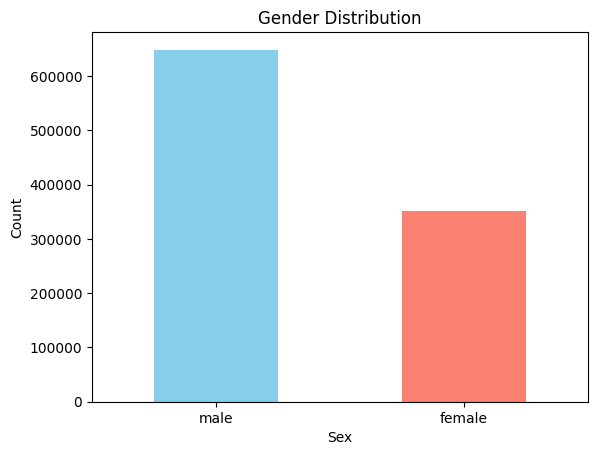

In [26]:
# Count the values for each gender
gender_counts = df['Sex'].value_counts()

# Plot the counts as a bar chart
gender_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()


In [29]:
survival_counts = df.Survived.value_counts()
print(survival_counts)

Survived
0    618319
1    381681
Name: count, dtype: int64


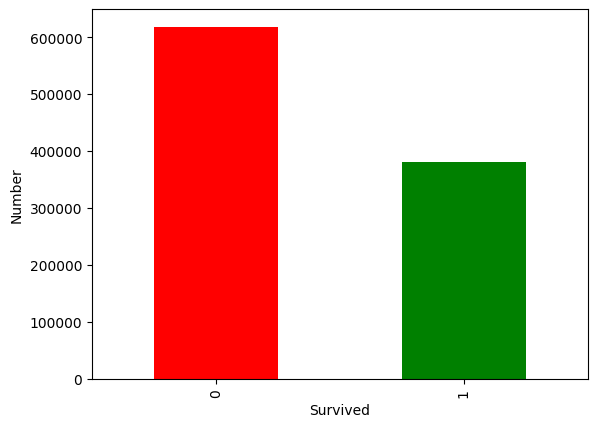

In [30]:
survival_counts.plot(kind="bar", color=["red", "green"])
plt.xlabel("Survived")
plt.ylabel("Number")
plt.show()

In [31]:
mean_of_survivors = df.Survived.mean()
print(mean_of_survivors)

0.381681


In [38]:
df.groupby("Sex")["Survived"].mean()

Sex
female    0.743166
male      0.186041
Name: Survived, dtype: float64

<Axes: xlabel='Sex'>

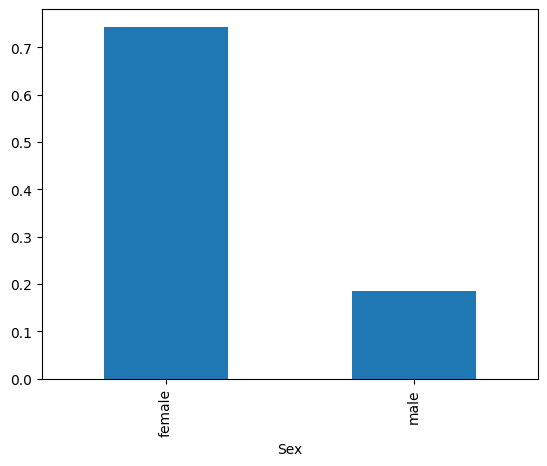

In [41]:
survival_rates = df.groupby("Sex")["Survived"].mean()
survival_rates.plot(kind="bar")


In [44]:
# Find the relation between passenger class and the survived target
passenger_class_survival_rate = df.groupby("Pclass")["Survived"].mean()

print(passenger_class_survival_rate)

Pclass
1    0.625446
2    0.477069
3    0.239764
Name: Survived, dtype: float64


<Axes: xlabel='Pclass'>

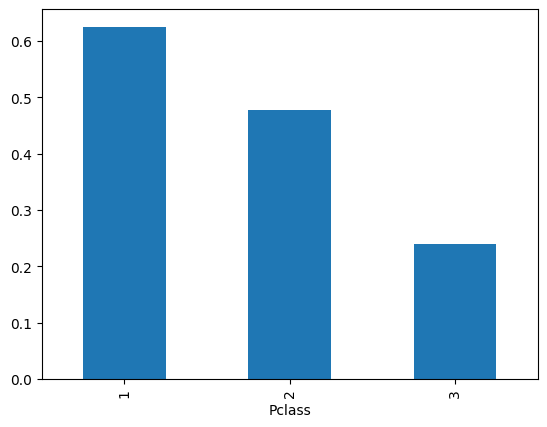

In [45]:
passenger_class_survival_rate.plot(kind="bar")


In [47]:
df.Age.tail()

999995    27.0
999996    33.0
999997     NaN
999998    35.0
999999    37.0
Name: Age, dtype: float64

In [48]:
df.Age.describe()

count    801400.000000
mean         29.280339
std          12.744978
min           0.000000
25%          21.000000
50%          29.000000
75%          37.000000
max         114.000000
Name: Age, dtype: float64

In [49]:
df.Age.info()

<class 'pandas.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: Age
Non-Null Count   Dtype  
--------------   -----  
801400 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


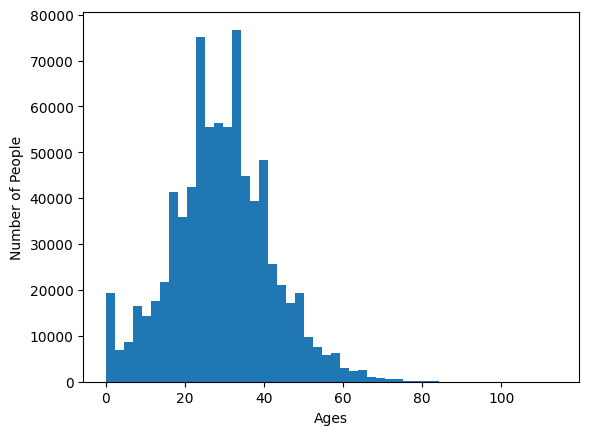

In [10]:
plt.hist(df["Age"], bins=50)
plt.xlabel('Ages')
plt.ylabel('Number of People')
plt.show()

In [12]:
# check if the median, is less, greater or equal to the mean to determine the skewness of ages

median_age = round(df["Age"].median())
mean_age = round(df["Age"].mean())

print(f"Mean age is: {mean_age}")
print(f"Median age is: {median_age}")

if mean_age < median_age:
    print("The Distribution is negatively skewed")
elif mean_age > median_age:
    print("The Distribution is positively skewed")
else:
    print("The Distribution is symmetrical")


Mean age is: 29
Median age is: 29
The Distribution is symmetrical


In [16]:
# Create an Age was missing indicator
df["Age_Missing"] = df["Age"].isna().astype(int)

print(df["Age_Missing"].head())

0    1
1    0
2    0
3    0
4    0
Name: Age_Missing, dtype: int64


In [19]:
df["Age"] = df["Age"].fillna(int(median_age))

In [20]:
print(df["Age"].head())

0    29.0
1    29.0
2    20.0
3    27.0
4    32.0
Name: Age, dtype: float64


In [21]:
df.groupby("Age_Missing")["Survived"].mean()

Age_Missing
0    0.38121
1    0.38358
Name: Survived, dtype: float64

In [29]:
# Need to create bins for age against survival rate
bins = [0, 12, 18, 35, 60, 100]
labels = ["Child", "Teen", "Young Adult", "Adult", "Senior"]

df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)


<Axes: xlabel='Age_Group'>

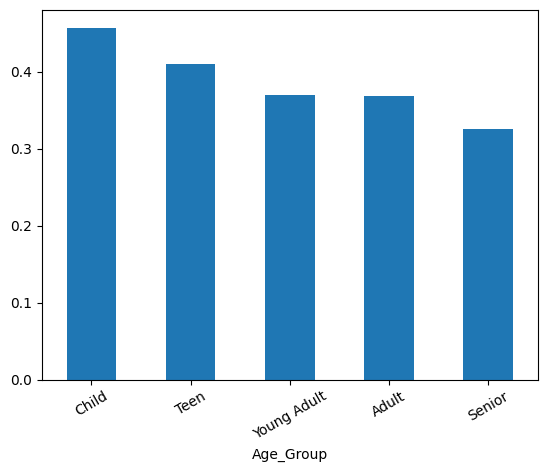

In [34]:
age_group_survival_rate = df.groupby("Age_Group")["Survived"].mean()
age_group_survival_rate.plot(kind="bar", rot=30)

In [35]:
df["SibSp"].info()

<class 'pandas.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: SibSp
Non-Null Count    Dtype
--------------    -----
1000000 non-null  int64
dtypes: int64(1)
memory usage: 7.6 MB


In [37]:
df["Fare"].head()

0    76.760165
1    10.193097
2    12.029416
3    13.429448
4     4.840769
Name: Fare, dtype: float64

<Axes: >

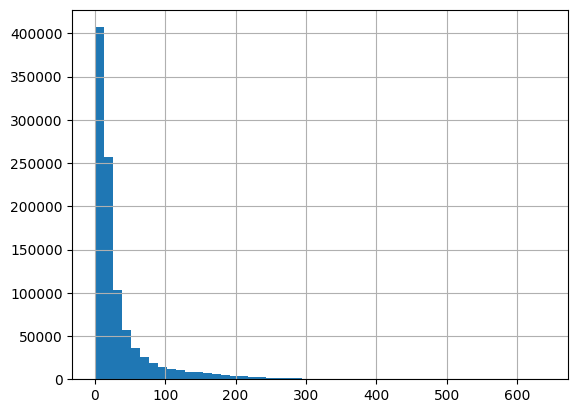

In [38]:
df["Fare"].hist(bins=50)

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Missing,Age-Group,Age_Group
0,1310,1,1,"Name1310, Miss. Surname1310",female,29.0,0,0,SOTON/O2 3101272,76.760165,NaN,C,1,Young Adult,Young Adult
1,1311,0,3,"Name1311, Col. Surname1311",male,29.0,0,0,223596,10.193097,NaN,S,0,Young Adult,Young Adult
2,1312,0,3,"Name1312, Mr. Surname1312",male,20.0,0,0,54636,12.029416,C83,C,0,Young Adult,Young Adult
3,1313,0,3,"Name1313, Mr. Surname1313",male,27.0,0,0,PC 17760,13.429448,NaN,S,0,Young Adult,Young Adult
4,1314,0,3,"Name1314, Mr. Surname1314",male,32.0,0,0,364512,4.840769,E33,C,0,Young Adult,Young Adult


In [41]:
df.drop("Age-Group", axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Missing,Age_Group
0,1310,1,1,"Name1310, Miss. Surname1310",female,29.0,0,0,SOTON/O2 3101272,76.760165,NaN,C,1,Young Adult
1,1311,0,3,"Name1311, Col. Surname1311",male,29.0,0,0,223596,10.193097,NaN,S,0,Young Adult
2,1312,0,3,"Name1312, Mr. Surname1312",male,20.0,0,0,54636,12.029416,C83,C,0,Young Adult
3,1313,0,3,"Name1313, Mr. Surname1313",male,27.0,0,0,PC 17760,13.429448,NaN,S,0,Young Adult
4,1314,0,3,"Name1314, Mr. Surname1314",male,32.0,0,0,364512,4.840769,E33,C,0,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1001305,0,2,"Name1001305, Mr. Surname1001305",male,27.0,0,0,244358,26.196512,NaN,S,0,Young Adult
999996,1001306,1,1,"Name1001306, Miss. Surname1001306",female,33.0,0,0,349221,102.555248,NaN,S,0,Young Adult
999997,1001307,0,3,"Name1001307, Mr. Surname1001307",male,29.0,1,0,PC 17601,8.274807,NaN,S,1,Young Adult
999998,1001308,0,2,"Name1001308, Mr. Surname1001308",male,35.0,1,0,112050,0.000000,B102,S,0,Young Adult


<Axes: >

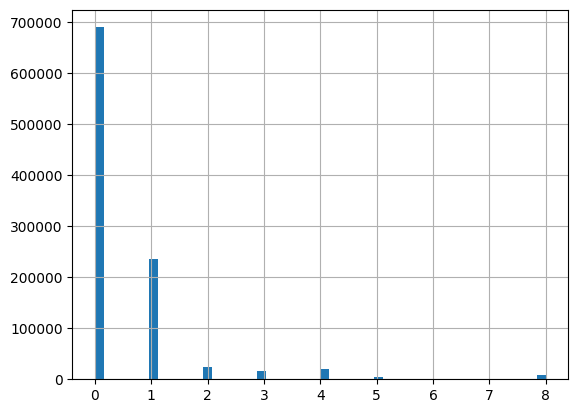

In [42]:
df.SibSp.hist(bins=50)

<Axes: >

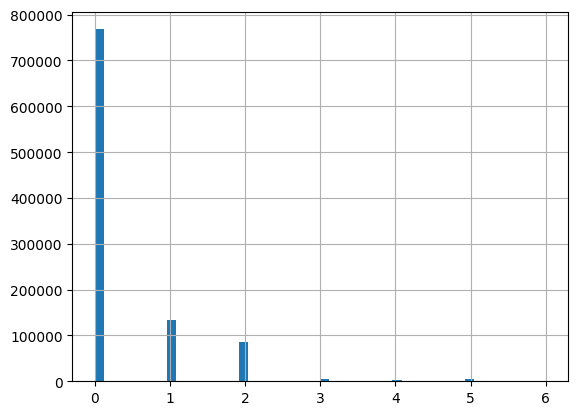

In [43]:
df.Parch.hist(bins=50)

<Axes: >

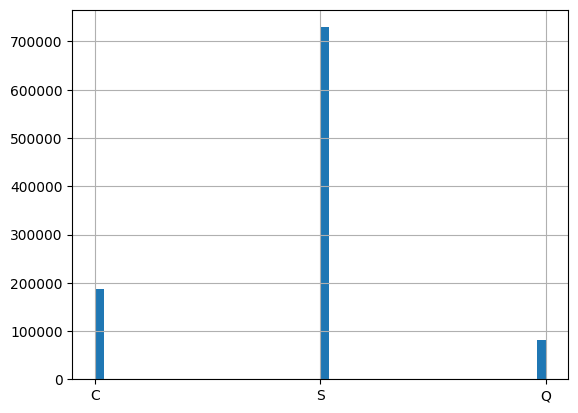

In [44]:
df["Embarked"].hist(bins=50)

In [45]:
df.groupby("Embarked")["Survived"].mean()

Embarked
C    0.542661
Q    0.380596
S    0.340593
Name: Survived, dtype: float64

In [46]:
df.groupby("SibSp")["Survived"].mean()

SibSp
0    0.343031
1    0.545175
2    0.459328
3    0.216877
4    0.092262
5    0.022522
8    0.031640
Name: Survived, dtype: float64

In [47]:
df.groupby("Parch")["Survived"].mean()

Parch
0    0.341035
1    0.553805
2    0.495265
3    0.635370
4    0.000000
5    0.175748
6    0.000000
Name: Survived, dtype: float64

In [3]:
X = ["Pclass", "Sex", "Age"]
print(df[X].head())

   Pclass     Sex   Age
0       1  female   NaN
1       3    male  29.0
2       3    male  20.0
3       3    male  27.0
4       3    male  32.0


<Axes: xlabel='SibSp'>

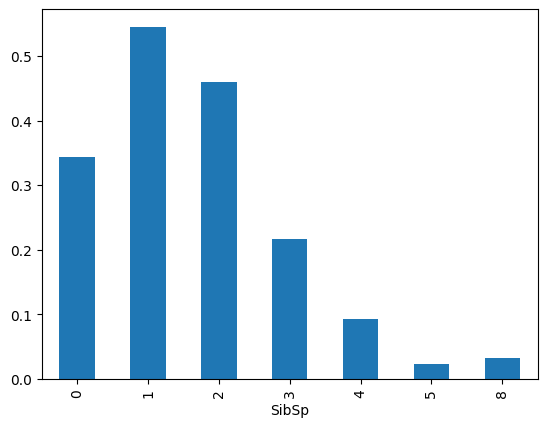

In [4]:
sibsp_survival_rate = df.groupby("SibSp")["Survived"].mean()
sibsp_survival_rate.plot(kind="bar")

In [10]:
print(df.groupby("Parch")["Survived"].mean())

Parch
0    0.341035
1    0.553805
2    0.495265
3    0.635370
4    0.000000
5    0.175748
6    0.000000
Name: Survived, dtype: float64
